In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ssr
from sklearn.metrics import mean_squared_error as mse

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

### Importing the data

In [4]:
df=pd.read_csv("nba_2013.csv")
print(df.columns)


Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')


In [5]:
print(df.shape)
print(df.head())

(481, 31)
          player pos  age bref_team_id  ...   pf   pts     season  season_end
0     Quincy Acy  SF   23          TOT  ...  122   171  2013-2014        2013
1   Steven Adams   C   20          OKC  ...  203   265  2013-2014        2013
2    Jeff Adrien  PF   27          TOT  ...  108   362  2013-2014        2013
3  Arron Afflalo  SG   28          ORL  ...  136  1330  2013-2014        2013
4  Alexis Ajinca   C   25          NOP  ...  187   328  2013-2014        2013

[5 rows x 31 columns]


### Data analysis 

In [6]:
df.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

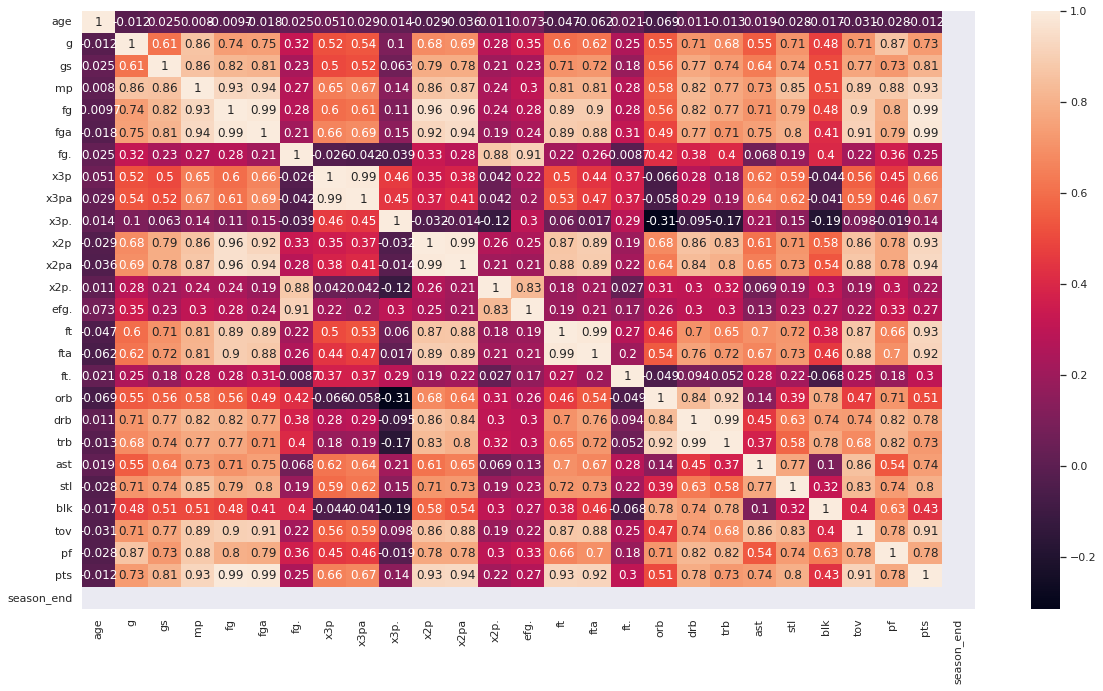

In [7]:
cr=df.corr()
sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(cr,annot=True)

In [8]:
df.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

### Replacing null values of a column with the column mean 

In [9]:
df['fg.'].fillna(df['fg.'].mean(),inplace=True)
df['x3p.'].fillna(df['x3p.'].mean(),inplace=True)
df['x2p.'].fillna(df['x2p.'].mean(),inplace=True)
df['efg.'].fillna(df['efg.'].mean(),inplace=True)
df['ft.'].fillna(df['ft.'].mean(),inplace=True)

In [10]:
df.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.             False
x3p             False
x3pa            False
x3p.            False
x2p             False
x2pa            False
x2p.            False
efg.            False
ft              False
fta             False
ft.             False
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [11]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

### Dropping out the non-integer and season_end (no use) column 

In [12]:
df_num=df.drop(['player','pos','bref_team_id','fg.','x3p.','x2p.','efg.','ft.','season','season_end'],axis=1)

In [13]:
df_num.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
       'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [14]:
df_num.head()

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,4,15,62,126,35,53,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0,0,93,185,79,136,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0,0,143,275,76,119,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,128,300,336,711,274,336,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0,1,136,248,56,67,94,183,277,40,23,46,63,187,328


### Standardizing the data 

In [15]:
sc=ssr().fit_transform(df_num)
sc

array([[-0.83677633,  0.3852869 , -0.86310432, ..., -0.66834514,
         0.22675114, -0.73538599],
       [-1.55210112,  1.09685132, -0.1880585 , ..., -0.0137745 ,
         1.36535809, -0.53535746],
       [ 0.11699006, -0.01002666, -0.45807683, ..., -0.5246589 ,
         0.02995488, -0.32894504],
       ...,
       [-0.35989314,  1.01778861,  1.76957436, ...,  1.48694846,
         1.50592685,  1.91605599],
       [-1.31365952,  1.13638268, -0.76184744, ...,  0.24166771,
         0.90148119, -0.05656577],
       [-0.59833473,  0.6620064 , -0.5593337 , ..., -0.18939101,
         0.43760428, -0.25021041]])

In [16]:
print(sc.shape)

(481, 21)


In [17]:
df_num_std = pd.DataFrame(sc)
df_num_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,-0.701011,-0.717354,-0.620576,-0.640874,-0.542737,-0.515944,0.260962,-0.129597,-0.013130,-0.645891,-0.468543,0.061474,-0.668345,0.226751,-0.735386
1,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,-0.779747,-0.830465,-0.409792,-0.440104,-0.117862,0.117140,1.389328,0.187214,0.566441,-0.531285,0.020702,1.066555,-0.013774,1.365358,-0.535357
2,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,-0.779747,-0.830465,-0.069818,-0.133844,-0.146831,-0.012528,0.744547,0.283635,0.436537,-0.569487,-0.439764,0.385694,-0.524659,0.029955,-0.328945
3,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,1.739801,1.431746,1.242482,1.349812,1.765106,1.642645,-0.383819,0.462702,0.216700,1.034996,-0.123194,-0.684232,1.183611,0.423547,1.730923
4,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,-0.779747,-0.822924,-0.117415,-0.225722,-0.339956,-0.409159,0.615591,0.139004,0.291645,-0.554207,-0.468543,0.709913,-0.141496,1.140448,-0.401296


In [18]:
df_num_std.columns=['age', 'g', 'gs', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
       'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

In [19]:
test=df_num_std['pts']
train=df_num_std.drop(['pts'],axis=1,inplace=False)

In [20]:
train

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf
0,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,-0.701011,-0.717354,-0.620576,-0.640874,-0.542737,-0.515944,0.260962,-0.129597,-0.013130,-0.645891,-0.468543,0.061474,-0.668345,0.226751
1,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,-0.779747,-0.830465,-0.409792,-0.440104,-0.117862,0.117140,1.389328,0.187214,0.566441,-0.531285,0.020702,1.066555,-0.013774,1.365358
2,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,-0.779747,-0.830465,-0.069818,-0.133844,-0.146831,-0.012528,0.744547,0.283635,0.436537,-0.569487,-0.439764,0.385694,-0.524659,0.029955
3,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,1.739801,1.431746,1.242482,1.349812,1.765106,1.642645,-0.383819,0.462702,0.216700,1.034996,-0.123194,-0.684232,1.183611,0.423547
4,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,-0.779747,-0.822924,-0.117415,-0.225722,-0.339956,-0.409159,0.615591,0.139004,0.291645,-0.554207,-0.468543,0.709913,-0.141496,1.140448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-1.552101,0.741069,-0.323068,0.588640,0.886192,1.040897,0.007612,0.587187,1.031698,1.040150,1.137450,1.566370,0.212603,-0.026289,0.046826,0.798143,1.114308,-0.262746,2.109589,0.634401
477,0.355432,0.424818,-0.559334,0.638845,1.130870,1.260727,1.877589,1.808781,0.671325,0.764516,1.388512,1.253641,-0.432177,-0.177807,-0.262945,-0.133985,0.193377,-0.392434,0.369389,0.704685
478,-0.359893,1.017789,1.769574,1.651870,2.266876,2.330021,0.991810,1.371420,2.303201,2.302619,0.693262,0.826500,1.776196,1.013678,1.285908,0.530729,3.675650,0.385694,1.486948,1.505927
479,-1.313660,1.136383,-0.761847,0.199273,-0.121649,-0.055537,-0.779747,-0.822924,0.127367,0.301725,0.529106,0.605302,1.002460,0.497138,0.671363,-0.156906,0.020702,0.547803,0.241668,0.901481


### Using 30% data as testing data and finding the optimal n_neighbors using KNN regressor 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=0)

In [22]:
for k in range(15):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("R2 score is:",format(r2_score(y_test, y_pred),'.4f'), "at k=", k_value)

R2 score is: 0.9372 at k= 1
R2 score is: 0.9597 at k= 2
R2 score is: 0.9607 at k= 3
R2 score is: 0.9559 at k= 4
R2 score is: 0.9621 at k= 5
R2 score is: 0.9580 at k= 6
R2 score is: 0.9613 at k= 7
R2 score is: 0.9651 at k= 8
R2 score is: 0.9588 at k= 9
R2 score is: 0.9593 at k= 10
R2 score is: 0.9567 at k= 11
R2 score is: 0.9533 at k= 12
R2 score is: 0.9525 at k= 13
R2 score is: 0.9521 at k= 14
R2 score is: 0.9524 at k= 15


#### Best score at k=8 

In [23]:
knn_fin=KNeighborsRegressor(n_neighbors=8)
knn_fin.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [24]:
y_pred=knn_fin.predict(x_test)

### Calculating the accuracy 

In [25]:
total_err=mse(y_test,y_pred)
reg_score=r2_score(y_test,y_pred)

print("Regression Score = ",reg_score)
print("Total accuracy = ",100.0-total_err)
print("Mean squared error = ",total_err)

Regression Score =  0.9650999896275054
Total accuracy =  99.96974015817058
Mean squared error =  0.030259841829418745


In [26]:
ans=pd.DataFrame({'Points 2013-14':y_test,'Points Predicted 2013-14':y_pred})
ans

,Points 2013-14,Points Predicted 2013-14
15,-0.171476,-0.455559
124,0.426482,0.404138
141,1.232980,0.843297
263,-1.058836,-1.055378
170,1.003160,0.872556
...,...,...
20,1.256387,1.218350
295,-1.024789,-1.089426
14,0.624382,0.655770
313,0.594591,0.495375
